In [116]:
!pip3 install folium
!pip3 install statsmodels 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 5.0 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.7/233.7 KB 7.1 MB/s eta 0:00:00


Downloading all the necessary library

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import folium as folium
from folium.features import DivIcon

In [2]:
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV      
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer #transform different types

Importing of data set

In [3]:
airports_data = pd.read_csv ('/Users/P1418664/Desktop/SIM/ST2195Coursework/airports.csv')
carriers_data = pd.read_csv ('/Users/P1418664/Desktop/SIM/ST2195Coursework/carriers.csv')
planes_data = pd.read_csv ('/Users/P1418664/Desktop/SIM/ST2195Coursework/plane-data.csv')
data_2007 = pd.read_csv ('/Users/P1418664/Desktop/SIM/ST2195Coursework/2007.csv')
data_2006 = pd.read_csv ('/Users/P1418664/Desktop/SIM/ST2195Coursework/2006.csv')
data_2005 = pd.read_csv ('/Users/P1418664/Desktop/SIM/ST2195Coursework/2005.csv') 


Creating a new dataframe for the plane seating capacity

In [5]:
data = [['550', 9], ['1121', 9], ['206B', 4],['421C',6],['65-A90',9],['737-322',150],['737-490',180], ['737-4Q8',180],['737-4S5',180],['737-522',140], ['737-790',150],['737-890',162],['737-8FH',162]
        ,['737-990',180], ['747-422',416],['747-451',416],['757-222',169],['757-223',169],['767-223',214],['767-322',214],['767-323',214],['767-325',214],['777-222',276],['A-1B',2],['A109E',6],['A319-131',150]
        ,['A320-232',170],['AS 355F1',4],['C90',4],['DC-7BF',105],['DC-9-82(MD-82)',170],['DC-9-83(MD-83)',150],['E-90',4],['G-IV',15],['HST-550',9],['PA-31-350',9],['PA-32R-300',6],['S-50A',4],['S-76A',15],['T210N',6]]
plane_cap = pd.DataFrame(data, columns= ['model','MaxCap'])
print(plane_cap)

             model  MaxCap
0              550       9
1             1121       9
2             206B       4
3             421C       6
4           65-A90       9
5          737-322     150
6          737-490     180
7          737-4Q8     180
8          737-4S5     180
9          737-522     140
10         737-790     150
11         737-890     162
12         737-8FH     162
13         737-990     180
14         747-422     416
15         747-451     416
16         757-222     169
17         757-223     169
18         767-223     214
19         767-322     214
20         767-323     214
21         767-325     214
22         777-222     276
23            A-1B       2
24           A109E       6
25        A319-131     150
26        A320-232     170
27        AS 355F1       4
28             C90       4
29          DC-7BF     105
30  DC-9-82(MD-82)     170
31  DC-9-83(MD-83)     150
32            E-90       4
33            G-IV      15
34         HST-550       9
35       PA-31-350       9
3

Combining the 3 years of data to one data frame and creating the different dictionary and renaming my column name 

In [4]:
total_data= pd.concat([data_2005, data_2006, data_2007])
week_dict= {1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday',7:'Sunday'}
month_dict= {1:'January',2:'Febraury',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
quarter_dict= {1:'First',2:'First',3:'First',4:'Second',5:'Second',6:'Second',7:'Third',8:'Third',9:'Third',10:'Fourth',11:'Fourth',12:'Fourth'}
planes_data= planes_data.rename(columns= {'tailnum':'TailNum'})

Creating total delay by adding arrival and departure delay.

In [5]:
total_data["TotalDelay"]=total_data["ArrDelay"] + total_data ["DepDelay"]

Question 1 – When is the best time of day, day of the week and time of year to fly to minimize delays?

Finding the best day of the week to fly to minimize delay

In [6]:
best_day= total_data[['DayOfWeek','DepDelay','ArrDelay','TotalDelay']].groupby('DayOfWeek').mean()
best_day=best_day.sort_values(by='TotalDelay',ascending=True)
print("Best time to minimize delays is to travel on {}".format(week_dict[best_day.index[0]]))

Best time to minimize delays is to travel on Saturday


Ploting of bar chart to see which is the best day to fly

<AxesSubplot:title={'center':'Which day have the least delays?'}, xlabel='Day Of Week'>

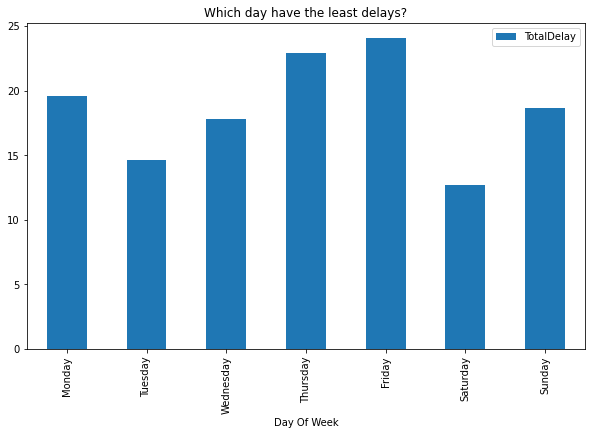

In [10]:
best_day_graph= best_day.reset_index()[['DayOfWeek','TotalDelay']]
best_day_graph=best_day_graph.sort_values(by='DayOfWeek',ascending=True)
best_day_graph.loc[:,'Day Of Week']= best_day_graph['DayOfWeek'].apply(lambda x:week_dict[x])
best_day_graph=best_day_graph[['Day Of Week','DayOfWeek','TotalDelay']].set_index('Day Of Week')
best_day_graph[['TotalDelay']].plot(kind='bar',figsize= (10,6),title='Which day have the least delays?')

Finding the best month to fly to minimize delay

In [12]:
best_month= total_data[['Month','DepDelay','ArrDelay','TotalDelay']].groupby('Month').mean()
best_month=best_month.sort_values(by='TotalDelay',ascending=True)
print("Best month to minimize delays is to travel on {}".format(month_dict[best_month.index[0]]))

Best month to minimize delays is to travel on September


Ploting of bar chart to see which is the best month to fly

<AxesSubplot:title={'center':'Which month have the least delays?'}, xlabel='Month'>

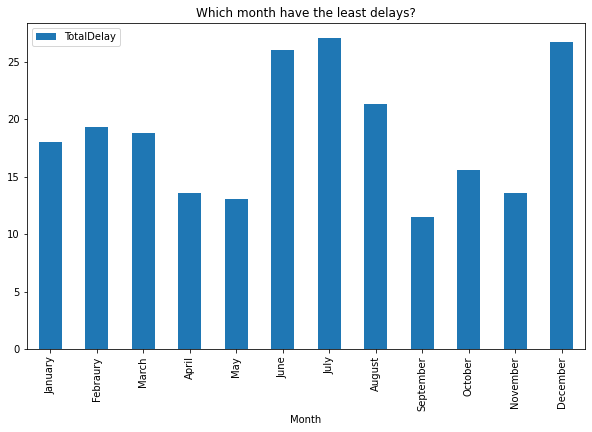

In [13]:
best_month_graph= best_month.reset_index()[['Month','TotalDelay']]
best_month_graph=best_month_graph.sort_values(by='Month',ascending=True)
best_month_graph.loc[:,'Month']= best_month_graph['Month'].apply(lambda x:month_dict[x])
best_month_graph=best_month_graph[['Month','TotalDelay']].set_index('Month')
best_month_graph[['TotalDelay']].plot(kind='bar',figsize= (10,6),title='Which month have the least delays?')

Finding the best quarter to fly to minimize delay 

In [15]:
total_data['Quarter']= total_data['Month'].apply(lambda x:quarter_dict[x])
best_quarter= total_data[['Quarter','DepDelay','ArrDelay','TotalDelay']].groupby('Quarter').mean()
best_quarter=best_quarter.sort_values(by='TotalDelay',ascending=True)
print("Best quarter to minimize delays is to travel on the {} quarter".format(best_quarter.index[0]))   

Best quarter to minimize delays is to travel on the Second quarter


Ploting of bar chart to see which is the best quarter to fly

<AxesSubplot:title={'center':'Which Quater have the least delays?'}, xlabel='Quarters'>

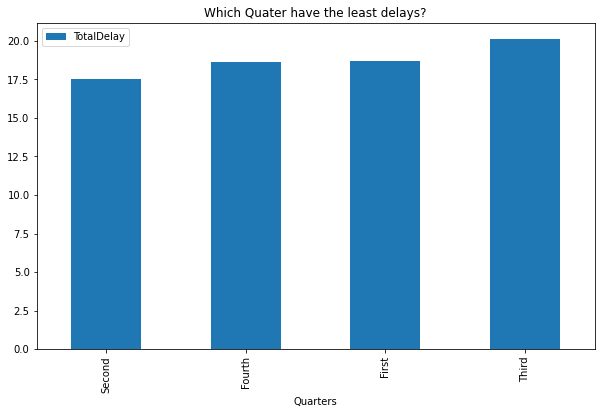

In [17]:
best_quarter_graph= best_quarter.reset_index()[['Quarter','TotalDelay']]
best_quarter_graph.loc[:,'Quarters']= best_quarter_graph['Quarter']
best_quarter_graph=best_quarter_graph[['Quarters','Quarter','TotalDelay']].set_index('Quarters')
best_quarter_graph[['TotalDelay']].plot(kind='bar',figsize= (10,6),title='Which Quater have the least delays?')

Creating a new column on time by cuting it 

In [26]:
total_data["Time"] = pd.cut(x = total_data["DepTime"], bins = [0,100,200,300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400],
                                    labels = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23'])

drop all the NA

In [23]:
total_data['Time'] = total_data['Time'].replace('NaN', np.nan)
total_data['Time']= total_data['Time'].replace(r'\s+|^$', np.nan, regex=True)
total_data = total_data.dropna(subset=['Time'])

In [ ]:
Finding the best time of the day to fly to minimize delay 

In [29]:
best_time= total_data[['Time','DepDelay','ArrDelay', 'TotalDelay']].groupby('Time').mean()
best_time=best_time.sort_values(by='TotalDelay',ascending=True)
print("Best time to minimize delays is to travel on the {} Hr".format(best_time.index[0]))   


Best time to minimize delays is to travel on the 05 Hr


Ploting of bar chart to see which is the best time of the day to fly

<AxesSubplot:title={'center':'Which time of the day have the least delays?'}, xlabel='Time of the day'>

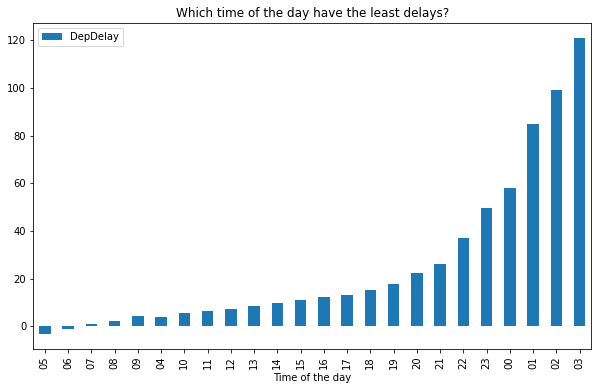

In [30]:
best_time_graph= best_time.reset_index()[['Time','DepDelay']]
best_time_graph.loc[:,'Time of the day']= best_time_graph['Time']
best_time_graph=best_time_graph[['Time of the day','Time','DepDelay']].set_index('Time of the day')
best_time_graph[['DepDelay']].plot(kind='bar',figsize= (10,6),title='Which time of the day have the least delays?')

Question 2 – Do older planes suffer more delays?

In [104]:
tailno_delay= total_data[['TailNum', 'ArrDelay', 'DepDelay','TotalDelay']]
tailno_delay = tailno_delay.dropna(subset=['ArrDelay','DepDelay','TotalDelay'])
tail_plane_delay= pd.merge(tailno_delay, planes_data, on='TailNum')
age_delay= tail_plane_delay[['year','DepDelay','ArrDelay','TotalDelay']].groupby('year').mean()
age_delay = age_delay.drop(age_delay.index[[0, 49]])
age_delay= age_delay.reset_index()

Changing the column type from object to interger

In [106]:
age_delay['year']= age_delay['year'].astype(int)

Plotting of scatter plot and regression line

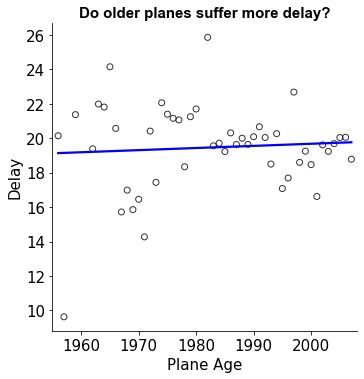

In [113]:
figsize = (15,15)
sns.lmplot(x = 'year', y= 'TotalDelay', fit_reg= True, data= age_delay, line_kws= {'color': 'blue'}, ci = None, markers='o',scatter_kws={'color':'black','facecolors':'none'})
plt.xlabel('Plane Age', fontname= 'Ariel', fontweight='light',fontsize= 15)
plt.ylabel('Delay', fontname= 'Ariel', fontweight='light',fontsize= 15)
plt.xticks(fontname= 'Ariel', fontweight='light',fontsize= 15)
plt.yticks(fontname= 'Ariel', fontweight='light',fontsize= 15)
plt.title('Do older planes suffer more delay?', fontname= 'Arial', fontweight='bold',fontsize= 15)
plt.xlim([1955,2008])
plt.show()

Summary to see if the age of the plane correlates to the delay

In [118]:
a = age_delay['year']
b = age_delay['TotalDelay']

a2 = sm.add_constant(a)
est = sm.OLS(b, a2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:             TotalDelay   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.017
Method:                 Least Squares   F-statistic:                    0.2298
Date:                Wed, 30 Mar 2022   Prob (F-statistic):              0.634
Time:                        01:39:29   Log-Likelihood:                -112.88
No. Observations:                  48   AIC:                             229.8
Df Residuals:                      46   BIC:                             233.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.9832     51.000     -0.098      0.9

Question 3 – How does the number of people flying between different airport change over time?

Getting the flight from 2 diff airport(ORD-Chicago and SAN-San Diego)

In [59]:
diff_airport_SAN = total_data[(total_data['Origin'] == 'ORD') & (total_data['Dest'] == 'SAN') | (total_data['Origin']== 'SAN') & (total_data['Dest'] == 'ORD')]
diff_airport_SAN = pd.merge(diff_airport_SAN, planes_data, on=['TailNum'])
diff_airport_SAN.drop(diff_airport_SAN[(diff_airport_SAN['type']=='Co-Owner') | (diff_airport_SAN['type']=='Individual') | (diff_airport_SAN['type']=='Partnership')].index , inplace=True)
diff_airport_SAN = pd.merge(diff_airport_SAN, plane_cap, on=['model'])
ORD_SAN= pd.DataFrame(diff_airport_SAN[['Year','MaxCap']].groupby('Year').sum())
ORD_SAN['changes']= ORD_SAN['MaxCap'].diff(periods=2)
ORD_SAN['iata']='SAN'
print(ORD_SAN)

      MaxCap   changes iata
Year                       
2005  914696       NaN  SAN
2006  838183       NaN  SAN
2007  807663 -107033.0  SAN


Los Angeles (LAX) and Chicago(ORD)

In [60]:
diff_airport_LAX = total_data[(total_data['Origin'] == 'ORD') & (total_data['Dest'] == 'LAX') | (total_data['Origin']== 'LAX') & (total_data['Dest'] == 'ORD')]
diff_airport_LAX = pd.merge(diff_airport_LAX, planes_data, on=['TailNum'])
diff_airport_LAX.drop(diff_airport_LAX[(diff_airport_LAX['type']=='Co-Owner') | (diff_airport_LAX['type']=='Individual') | (diff_airport_LAX['type']=='Partnership')].index , inplace=True)
diff_airport_LAX = pd.merge(diff_airport_LAX, plane_cap, on=['model'])
ORD_LAX= pd.DataFrame(diff_airport_LAX[['Year','MaxCap']].groupby('Year').sum())
ORD_LAX['changes']= ORD_LAX['MaxCap'].diff(periods=2)
ORD_LAX['iata']='LAX'
print(ORD_LAX)

       MaxCap   changes iata
Year                        
2005  1940936       NaN  LAX
2006  1896469       NaN  LAX
2007  1742614 -198322.0  LAX


New York(LGA) and Chicago(ORD)

In [58]:
diff_airport_LGA = total_data[(total_data['Origin'] == 'ORD') & (total_data['Dest'] == 'LGA') | (total_data['Origin']== 'LGA') & (total_data['Dest'] == 'ORD')]
diff_airport_LGA = pd.merge(diff_airport_LGA, planes_data, on=['TailNum'])
diff_airport_LGA.drop(diff_airport_LGA[(diff_airport_LGA['type']=='Co-Owner') | (diff_airport_LGA['type']=='Individual') | (diff_airport_LGA['type']=='Partnership')].index , inplace=True)
diff_airport_LGA = pd.merge(diff_airport_LGA, plane_cap, on=['model'])
ORD_LGA= pd.DataFrame(diff_airport_LGA[['Year','MaxCap']].groupby('Year').sum())
ORD_LGA['changes']= ORD_LGA['MaxCap'].diff(periods=2)
ORD_LGA['iata']='LGA'
print(ORD_LGA)

       MaxCap  changes iata
Year                       
2005  2482392      NaN  LGA
2006  2536579      NaN  LGA
2007  2532973  50581.0  LGA


Seattle(SEA) and Chicago(ORD)

In [57]:
diff_airport_SEA = total_data[(total_data['Origin'] == 'ORD') & (total_data['Dest'] == 'SEA') | (total_data['Origin']== 'SEA') & (total_data['Dest'] == 'ORD')]
diff_airport_SEA = pd.merge(diff_airport_SEA, planes_data, on=['TailNum'])
diff_airport_SEA.drop(diff_airport_SEA[(diff_airport_SEA['type']=='Co-Owner') | (diff_airport_SEA['type']=='Individual') | (diff_airport_SEA['type']=='Partnership')].index , inplace=True)
diff_airport_SEA = pd.merge(diff_airport_SEA, plane_cap, on=['model'])
ORD_SEA= pd.DataFrame(diff_airport_SEA[['Year','MaxCap']].groupby('Year').sum())
ORD_SEA['changes']= ORD_SEA['MaxCap'].diff(periods=2)
ORD_SEA['iata']='SEA'
print(ORD_SEA)

       MaxCap  changes iata
Year                       
2005  1286527      NaN  SEA
2006  1300029      NaN  SEA
2007  1246240 -40287.0  SEA


San Francisco(SFO) and Chicago(ORD)

In [56]:
diff_airport_SFO = total_data[(total_data['Origin'] == 'ORD') & (total_data['Dest'] == 'SFO') | (total_data['Origin']== 'SFO') & (total_data['Dest'] == 'ORD')]
diff_airport_SFO = pd.merge(diff_airport_SFO, planes_data, on=['TailNum'])
diff_airport_SFO.drop(diff_airport_SFO[(diff_airport_SFO['type']=='Co-Owner') | (diff_airport_SFO['type']=='Individual') | (diff_airport_SFO['type']=='Partnership')].index , inplace=True)
diff_airport_SFO = pd.merge(diff_airport_SFO, plane_cap, on=['model'])
ORD_SFO= pd.DataFrame(diff_airport_SFO[['Year','MaxCap']].groupby('Year').sum())
ORD_SFO['changes']= ORD_SFO['MaxCap'].diff(periods=2)
ORD_SFO['iata']='SFO'
print(ORD_SFO)

       MaxCap  changes iata
Year                       
2005  1692171      NaN  SFO
2006  1667989      NaN  SFO
2007  1631327 -60844.0  SFO


Joining the table together and assigning color based on the changes in the number of passenger 

In [103]:
airports_total=pd.concat([ORD_SFO, ORD_LGA,ORD_SEA,ORD_SAN,ORD_LAX])
airports_total['changes'] = airports_total['changes'].replace(np.nan, 0)
airports_total['Colour'] =np.where(airports_total['changes']>0,'green','red')
airports_total

,MaxCap,changes,iata,Colour
Year,,,,
2005,1692171,0.0,SFO,red
2006,1667989,0.0,SFO,red
2007,1631327,-60844.0,SFO,red
2005,2482392,0.0,LGA,red
2006,2536579,0.0,LGA,red
2007,2532973,50581.0,LGA,green
2005,1286527,0.0,SEA,red
2006,1300029,0.0,SEA,red
2007,1246240,-40287.0,SEA,red


Merging with airport data to get the name and the coordinates for the airport

In [104]:
airports_coord= airports_data[(airports_data['iata']=='SAN') | (airports_data['iata']=='LGA') | (airports_data['iata']=='SEA') | (airports_data['iata']=='LAX') | (airports_data['iata']=='SFO') | (airports_data['iata']=='ORD')]
airports_total = pd.merge(airports_total, airports_coord, on=['iata'])
airports_total

,MaxCap,changes,iata,Colour,airport,city,state,country,lat,long
0,1692171,0.0,SFO,red,San Francisco International,San Francisco,CA,USA,37.619002,-122.374843
1,1667989,0.0,SFO,red,San Francisco International,San Francisco,CA,USA,37.619002,-122.374843
2,1631327,-60844.0,SFO,red,San Francisco International,San Francisco,CA,USA,37.619002,-122.374843
3,2482392,0.0,LGA,red,LaGuardia,New York,NY,USA,40.777243,-73.872609
4,2536579,0.0,LGA,red,LaGuardia,New York,NY,USA,40.777243,-73.872609
5,2532973,50581.0,LGA,green,LaGuardia,New York,NY,USA,40.777243,-73.872609
6,1286527,0.0,SEA,red,Seattle-Tacoma Intl,Seattle,WA,USA,47.448982,-122.309313
7,1300029,0.0,SEA,red,Seattle-Tacoma Intl,Seattle,WA,USA,47.448982,-122.309313
8,1246240,-40287.0,SEA,red,Seattle-Tacoma Intl,Seattle,WA,USA,47.448982,-122.309313
9,914696,0.0,SAN,red,San Diego International-Lindbergh,San Diego,CA,USA,32.733556,-117.189657


ploting a map of the airport and the changes using folium

In [105]:
Chicago_Coord=[41.9796,-87.90446]
site_map = folium.Map(location=Chicago_Coord, zoom_start=10)
circle = folium.Circle(Chicago_Coord, radius=1000, color='#d35400', fill=True).add_child(folium.Popup("Chicago O'Hare International"))
marker = folium.map.Marker(
    Chicago_Coord,
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "Chicago O'Hare International",
        )
    )
site_map.add_child(circle)
site_map.add_child(marker)
for i in range (len(airports_total.index)):
    coordinate = [airports_total["lat"][i], airports_total["long"][i]]
    circle = folium.Circle(coordinate, radius=100, color='#d35400', fill=True).add_child(folium.Popup(airports_total["airport"][i]))
    marker = folium.map.Marker(
        coordinate,
        icon=DivIcon(
            icon_size=(20,20),
            icon_anchor=(0,0),
            html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % airports_total["airport"][i],
            )
        )
    line = folium.PolyLine([coordinate, Chicago_Coord], color=[airports_total['Colour'][i]])
    site_map.add_child(circle)
    site_map.add_child(marker)
    site_map.add_child(line)
site_map

Question 4 –Can you detect cascading failures as delays in one airport create delays in others?

In [47]:
cascading_airport= total_data[['TailNum', 'Year','Month', 'DayofMonth', 'DepTime', 'CRSDepTime','ActualElapsedTime','CRSElapsedTime', 'ArrTime', 'CRSArrTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest']]
cascading_airport= cascading_airport.rename(columns= {'DayofMonth':'Day'})
cascading_airport['Date']= pd.to_datetime(cascading_airport[['Year', 'Month', 'Day']])
cascading_airport= cascading_airport[(cascading_airport['Origin']=='ORD') | (cascading_airport['Dest']=='ORD')]


Geeting the flights that does not encounter cascading failures

In [48]:
cascading_not_airport= cascading_airport[((cascading_airport['Dest']=='ORD') & (cascading_airport['DepDelay']>0) & (cascading_airport['ArrDelay']>0)) | ((cascading_airport['Origin']=='ORD') & (cascading_airport['DepDelay']<=0) & (cascading_airport['ArrDelay']<=0))]
cascading_not_airport= cascading_not_airport.groupby(['TailNum','Date']).filter(lambda x: len(x) > 1)
cascading_not_airport['Cascading']= 0
cascading_not_airport

Geeting the flights that does encounter cascading failures

In [54]:
cascading_airport= cascading_airport[((cascading_airport['Dest']=='ORD') & (cascading_airport['DepDelay']>0) & (cascading_airport['ArrDelay']>0)) | ((cascading_airport['Origin']=='ORD') & (cascading_airport['DepDelay']>0) & (cascading_airport['ArrDelay']>0))]
cascading_airport= cascading_airport.groupby(['TailNum','Date']).filter(lambda x: len(x) > 1)
cascading_airport['Cascading']= 1

Merging the dataset arangging the data based on tail number, date, depature time and whether it encounter cascading failures 

In [57]:
cascading_airport= pd.concat([cascading_airport, cascading_not_airport])
cascading_airport= cascading_airport.sort_values(['TailNum', 'Date', 'DepTime', 'Cascading'])
cascading_airport

,TailNum,Year,Month,Day,DepTime,CRSDepTime,ActualElapsedTime,CRSElapsedTime,ArrTime,CRSArrTime,ArrDelay,DepDelay,Origin,Dest,Date,Cascading
1331107,N10156,2006,3,28,1256.0,1147,180.0,152.0,1556.0,1419,97.0,69.0,IAH,ORD,2006-03-28,1
1346247,N10156,2006,3,28,1615.0,1515,155.0,173.0,1850.0,1808,42.0,60.0,ORD,IAH,2006-03-28,1
1944343,N10156,2006,4,3,1304.0,1148,206.0,162.0,1630.0,1430,120.0,76.0,IAH,ORD,2006-04-03,1
1955086,N10156,2006,4,3,1708.0,1510,148.0,170.0,1936.0,1800,96.0,118.0,ORD,IAH,2006-04-03,1
3121023,N10156,2006,6,18,1053.0,910,138.0,154.0,1311.0,1144,87.0,103.0,IAH,ORD,2006-06-18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944598,n409ca,2005,4,14,1320.0,1310,88.0,77.0,1548.0,1527,21.0,10.0,ORD,CVG,2005-04-14,1
773426,n816ca,2005,2,28,1808.0,1745,83.0,86.0,1831.0,1811,20.0,23.0,CVG,ORD,2005-02-28,1
757933,n816ca,2005,2,28,1900.0,1840,77.0,78.0,2117.0,2058,19.0,20.0,ORD,CVG,2005-02-28,1
1932842,n816ca,2005,4,3,1312.0,1240,63.0,70.0,1315.0,1250,25.0,32.0,CVG,ORD,2005-04-03,1


Plot a pie chart to represent cascading failure

Text(0.5, 1.0, 'Does delay in one airport affect the other?')

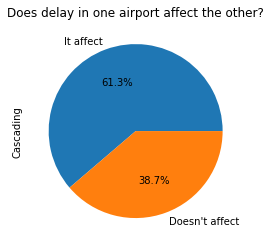

In [58]:
cascading_airport_number= cascading_airport['Cascading'].value_counts()
ax= cascading_airport_number.plot(kind='pie',autopct='%1.1f%%',labels=["It affect", "Doesn't affect"])
ax.set_title('Does delay in one airport affect the other?')

Question 5 – Use the available variables to construct a model that predict delays.

Merging the data together to get the age of the plane

In [8]:
combine_data= pd.merge(total_data, planes_data, on=['TailNum'])

removing the NA's and making the Departure delay into binary number. 1= yes, 0= no

In [12]:
combine_data = combine_data.replace('NaN', np.nan)
combine_data= combine_data.replace(r'\s+|^$', np.nan, regex=True)
combine_data['Delays'] =np.where(combine_data['DepDelay']>0,1,0)

Sampling 10% of the dataset 

In [26]:
combine_data=combine_data.sample(int(len(combine_data) * 0.1))


response stored in "y"

In [27]:
combine_data= combine_data.rename(columns= {'year':'Age'})
features = ['Age','Month','DayOfWeek','Origin','Dest','Time','Delays']
X = combine_data[features].copy()
X=X.dropna()
Y = X['Delays']
X

,Age,Month,DayOfWeek,Origin,Dest,Time,Delays
4088545,2000,7,5,LGA,MYR,09,1
14627742,2001,7,2,SAT,IAH,19,1
15970102,2005,6,4,LIT,DFW,16,1
10395457,1988,1,6,PHX,RNO,20,0
4136706,2003,9,7,CVG,GSP,21,1
...,...,...,...,...,...,...,...
16287542,2005,6,6,FLL,BOS,11,1
5422928,1996,4,7,CIC,SFO,14,1
11390932,2001,5,7,ORD,HSV,07,0
3128827,1967,9,1,MKE,DTW,19,0


Pipelines: Pre-Processing

In [29]:
numerical_features =  ['Month','DayOfWeek','Time']

numerical_transformer = Pipeline(steps=[  
    ('imputer', SimpleImputer()),     
    ('scaler', StandardScaler())])      # Apply StandardScaler() into pipeline

categorical_features = ['Origin', 'Dest']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer()),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])    # Create dummy variables

data_transformer = ColumnTransformer(
    transformers=[
        ('numerical', numerical_transformer, numerical_features),
        ('categorical', categorical_transformer, categorical_features)])

Getting training and test sets

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

In [31]:
param_grid = {
    'data_transformer__numerical__imputer__strategy': ['mean','median'],
    'data_transformer__categorical__imputer__strategy': ['constant','most_frequent']
}

Pipelines: Logistic Regression

In [32]:
pipe_lr = Pipeline(steps=[('data_transformer', data_transformer),
                          ('pipe_lr', LogisticRegression(max_iter=10000))])
grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(X_train, Y_train);                          

Pipelines: Gradient Boosting

In [33]:
pipe_gdb = Pipeline(steps=[('data_transformer', data_transformer),
                           ('pipe_gdb', GradientBoostingClassifier(random_state=2))])

grid_gdb = GridSearchCV(pipe_gdb, param_grid=param_grid)
grid_gdb.fit(X_train, Y_train);

Pipelines: Penalize logistic regression

In [35]:
pipe_plr = Pipeline(steps=[('data_transformer', data_transformer),
                          ('pipe_plr', LogisticRegression(penalty='l1',max_iter=10000, tol=0.01, solver='saga'))])
grid_plr = GridSearchCV(pipe_plr, param_grid=param_grid)
grid_plr.fit(X_train, Y_train);  

Pipelines: Classification tree

In [38]:
pipe_tree = Pipeline(steps=[('data_transformer', data_transformer),
                          ('pipe_tree', DecisionTreeClassifier(random_state=0))])
grid_tree = GridSearchCV(pipe_tree, param_grid=param_grid)
grid_tree.fit(X_train, Y_train);  

Pipelines: Random forest

In [44]:
pipe_rf = Pipeline(steps=[('data_transformer', data_transformer),
                          ('pipe_rf', RandomForestClassifier(random_state=0))])
grid_rf = GridSearchCV(pipe_rf, param_grid=param_grid)
grid_rf.fit(X_train, Y_train);  

Plot the ROC Curve

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Func

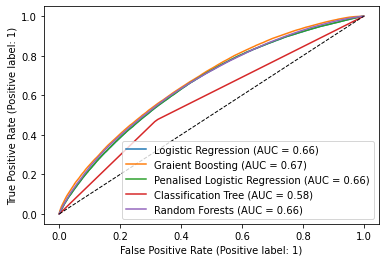

In [45]:
ax= plt.gca()
plot_roc_curve(grid_lr,X_test,Y_test,ax=ax, name='Logistic Regression')
plot_roc_curve(grid_gdb,X_test,Y_test,ax=ax, name='Graient Boosting')
plot_roc_curve(grid_plr,X_test,Y_test,ax=ax, name='Penalised Logistic Regression')
plot_roc_curve(grid_tree,X_test,Y_test,ax=ax, name='Classification Tree')
plot_roc_curve(grid_rf,X_test,Y_test,ax=ax, name='Random Forests')
plt.plot([0,1],[0,1], color='black', lw=1, linestyle='--')
plt.show()